<h3>Manipulação de Arquivos JSON com a Base de Dados do IRIS</h3>

In [2]:
from Neuraline.Utilities.data import DataTable, DataExploration # importação das classes para manipulação e exploração de dados
data_table, data_exploration = DataTable(), DataExploration() # criação dos objetos com a instanciação das classes
url_path = 'iris.json' # variável com o endereço do arquivo
data_table.visualization_json_inline(url_path=url_path, limit=5) # visualização dos dados, somente as 5 primeiras linhas
names = {-1: 'setosa', 0: 'versicolor', 1: 'virginica'}
labels = data_exploration.getOutputTypesJSON(url_path=url_path, output_column='species') # captura dos tipos de saída
labels = [names[y] for y in labels]
print(f'species: {labels}') # exibição dos tipos de saída

╒═══════════════╤══════════════╤═══════════════╤══════════════╤═══════════╕
│   sepalLength │   sepalWidth │   petalLength │   petalWidth │   species │
╞═══════════════╪══════════════╪═══════════════╪══════════════╪═══════════╡
│           5.1 │          3.5 │           1.4 │          0.2 │        -1 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.9 │          3   │           1.4 │          0.2 │        -1 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.7 │          3.2 │           1.3 │          0.2 │        -1 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.6 │          3.1 │           1.5 │          0.2 │        -1 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           5   │          3.6 │           1.4 │          0.2 │        -1 │
╘═══════════════╧══════════════╧═══════════════╧══════════════╧═══════════╛
species: ['v

In [6]:
list_inputs, list_outputs = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'], ['species'] # definição das listas de entrada e saída
inputs_train, outputs_train, inputs_test, outputs_test = data_exploration.dataSeparationJSON( # método de separação dos dados entre treinamento e teste
    url_path=url_path, # endereço do arquivo de leitura
    list_inputs=list_inputs, # lista com os nomes das colunas que serão usadas como entrada
    list_outputs=list_outputs, # lista com os nomes das colunas que serão usadas como saída
    training_percentage=.8, # percentual relativo a proporção dos dados que serão usados para treino
    test_percentage=.2 # percentual relativo a proporção dos dados que serão usados para teste
)
from Neuraline.ArtificialIntelligence.DeepLearning.neural_network import NeuralNetwork
neural_network = NeuralNetwork() # criação do objeto com a instanciação da classe
neural_network.fit(inputs=inputs_train, outputs=outputs_train, epochs=5, activation_function='linear', show_error=True)

epoch...............................: 1 - loss: 0.80000000
epoch...............................: 2 - loss: 0.60000000
epoch...............................: 3 - loss: 0.40000000
epoch...............................: 4 - loss: 0.20000000
epoch...............................: 5 - loss: 0.00000000


True

In [7]:
result_test = neural_network.test(inputs=inputs_test, outputs=outputs_test) # teste de assertividade do modelo
result_test # exibição do resultado probabilístico do teste

{'assertiveness': 0.8326079314298374, 'error': 0.16739206857016264}

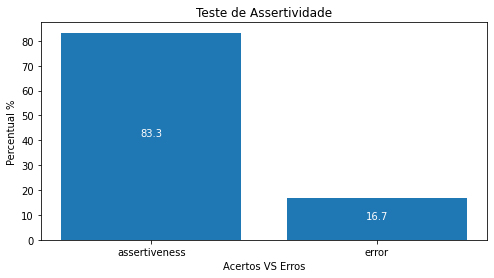

In [8]:
from Neuraline.Utilities.chart import Chart # importação da classe para manipulação de gráficos
chart = Chart() # criação do objeto com a instanciação da classe
x, y = list(result_test.keys()), [y*100 for y in list(result_test.values())] # definição das listas dos eixos X e Y do gráfico
chart.plotBAR(x=x, y=y, x_label='Acertos VS Erros', y_label='Percentual %', title='Teste de Assertividade', bar_values=True) # exibição do gráfico